# Introduction à l'apprentissage automatique: TP2 - Exercice 1

<br>

### Reconnaissance de chiffres manuscrits par classification aux plus proches voisins

<br>

Les méthodes d'apprentissage supervisé de scikit-learn permettent de définir un objet, doté de différents attributs et méthodes, dont `fit` (pour procéder à l'apprentissage), `predict` (pour prédire les classes des éléments d'une base de test), ou `score` pour calculer la proportion d'observations bien classées dans la base de test, lorsqu'on connaît par ailleurs la "vraie" classe.

Exemple d'utilisation:

```python
# classifieur au plus proche voisin (on peut changer n_neighbors):
knn = neighbors.KNeighborsClassifier(n_neighbors=1)  

# on cherchera le p.p.v. dans X_train, la prédiction sera la classe de ce p.p.v., donnée par y_train:
knn.fit(X_train,y_train)  # (il n'y a pas d'apprentissage à proprement parler dans knn)

# on stocke dans y_pred les classes prédites sur un ensemble de test:
y_pred = knn.predict(X_test)  

# calcul d'un score lorsqu'on connaît les vraies classes des observations de X_test: 
# (proportion d'observations pour lesquelles y_test==y_pred)
score = knn.score(X_test,y_test)
```

En vous basant sur le script disponible [dans la documentation de scikit-learn](http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html) implantez une classification aux $K$ plus proches voisins de la base des chiffres manuscrits: vous utiliserez comme base d'apprentissage 50% des données de `digits`, et vous calculerez le score de classification sur les 50% restants, lorsque $K$ varie entre 1 et 20.

Quelle valeur de $K$ semble la plus adaptée  ce problème?


In [6]:
# votre code ici
print(__doc__)

from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data / digits.data.max()
y_digits = digits.target
results = []

n_samples = len(X_digits)

X_train = X_digits[:int(.5 * n_samples)]
y_train = y_digits[:int(.5 * n_samples)]
X_test = X_digits[int(.5 * n_samples):]
y_test = y_digits[int(.5 * n_samples):]

for i in range(1,20):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000,
                                           multi_class='multinomial')
    results.append([i, 
                    knn.fit(X_train, y_train).score(X_test, y_test), 
                    logistic.fit(X_train, y_train).score(X_test, y_test)])

for k in results:
    print(k)


Automatically created module for IPython interactive environment
[1, 0.9610678531701891, 0.9343715239154616]
[2, 0.9599555061179088, 0.9343715239154616]
[3, 0.9632925472747497, 0.9343715239154616]
[4, 0.9532814238042269, 0.9343715239154616]
[5, 0.9555061179087876, 0.9343715239154616]
[6, 0.9532814238042269, 0.9343715239154616]
[7, 0.9521690767519466, 0.9343715239154616]
[8, 0.9532814238042269, 0.9343715239154616]
[9, 0.949944382647386, 0.9343715239154616]
[10, 0.9543937708565072, 0.9343715239154616]
[11, 0.9488320355951056, 0.9343715239154616]
[12, 0.9488320355951056, 0.9343715239154616]
[13, 0.9410456062291435, 0.9343715239154616]
[14, 0.9454949944382648, 0.9343715239154616]
[15, 0.9432703003337041, 0.9343715239154616]
[16, 0.9432703003337041, 0.9343715239154616]
[17, 0.9432703003337041, 0.9343715239154616]
[18, 0.9477196885428254, 0.9343715239154616]
[19, 0.9454949944382648, 0.9343715239154616]


In [ ]:
#il semble qu'il faille garder 3 voisins.

Lorsqu'on fixe la base d'apprentissage et la base de test a priori, on introduit des fluctuations d'échantillonnage: une autre partition de la base de données originale entre apprentissage et test donnerait des scores légèrement différents. D'autre part, la partie de la base initiale réservée au test ne sert jamais pour l'apprentissage, ce qui est tout dommage.

Une manière de dépasser cette limitation est la _validation croisée_ décrite [sur wikipedia](https://fr.wikipedia.org/wiki/Validation_crois%C3%A9e). Constatez que l'on vient d'implémenter la _holdout method_.

En vous inspirant de la syntaxe [décrite dans la documentation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics), adaptez le code de la question précédente pour calculer une _5-fold cross validation_ ("validation croisée à 5 plis") et une _10-fold cross validation_ (ce sont les deux approches traditionnelles) sur toute la base `digits`. Vous utiliserez la fonction `cross_val_score`. On peut difficilement trop augmenter le nombre de "plis" car le temps de calcul grandit.

Constatez que le temps de calcul devient handicapant lorsque le nombre de plis augmente: ceci motive les approches _n-fold cross validation_ par rapport à la validation _leave-one-out_.

In [1]:
# cross validation pour la méthode des k neighbors, exécuté avec k = 3 ou 1 , et ici en 5 ou 10-fold-cross
print(__doc__)

from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors, linear_model
from sklearn.model_selection import cross_val_score

digits = datasets.load_digits()
X_digits = digits.data / digits.data.max()
y_digits = digits.target

n_samples = len(X_digits)

print("k = 3 :")
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, digits.data, digits.target, cv=5)

print("Moyenne obtenue pour la cross validation en 5-fold-cross : ", sum(scores)/len(scores), )

clf = neighbors.KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, digits.data, digits.target, cv=10)

print("Moyenne obtenue pour la cross validation en 10-fold-cross : ", sum(scores)/len(scores), "\n")

print("k = 1 :")

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, digits.data, digits.target, cv=5)

print("Moyenne obtenue pour la cross validation en 5-fold-cross : ", sum(scores)/len(scores))

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, digits.data, digits.target, cv=10)

print("Moyenne obtenue pour la cross validation en 10-fold-cross : ", sum(scores)/len(scores))


Automatically created module for IPython interactive environment
k = 3 :
Moyenne obtenue pour la cross validation en 5-fold-cross :  0.9661143537042125
Moyenne obtenue pour la cross validation en 10-fold-cross :  0.9777892113798643 

k = 1 :
Moyenne obtenue pour la cross validation en 5-fold-cross :  0.9649752094799343
Moyenne obtenue pour la cross validation en 10-fold-cross :  0.9761493860252022


In [ ]:
#on obtien de meilleurs résultats pour k = 3 (intuition de la question 1 comfirmée), et en 10-fold-cross

La fonction suivante permet d'afficher les 150 premières images d'une base de test, ainsi que la classe déterminée par l'algorithme de classification et la classe véritable, qui est connue dans cet exercice.

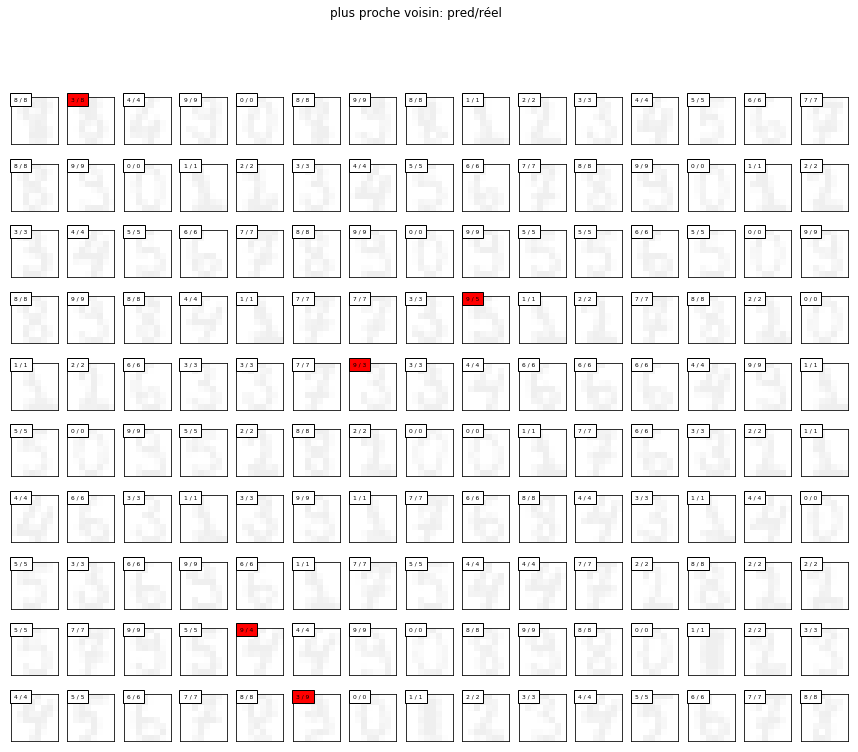

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def affichage_150_images(X_test,y_test,y_pred):
    plt.figure(figsize=[15,12])   
    for n in range(150):
        plt.subplot(10,15,n+1,xticks=[],yticks=[])
        plt.imshow(np.reshape(X_test[n,:],(8,8)),cmap='gray_r',vmin=0,vmax=16)
        if y_pred_nn[n]==y_test[n]:
            plt.text(0.1,0.1,str(y_pred[n])+' / '+str(y_test[n]),fontsize=6,bbox=dict(facecolor='white', alpha=1))    
        else:
            plt.text(0.1,0.1,str(y_pred[n])+' / '+str(y_test[n]),fontsize=6,bbox=dict(facecolor='red', alpha=1))    
    plt.suptitle('plus proche voisin: pred/réel');


# exemple d'utilisation: classification au plus proche voisin et bases train / test de la première question:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)  # essayez n_neighbors=10
knn.fit(X_train, y_train)
y_pred_nn = knn.predict(X_test)
affichage_150_images(X_test,y_test,y_pred_nn)      


Quelles sont les informations fournies par `classification_report` et `confusion_matrix` du module `metrics` ? 

Voir [la documentation](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)


In [23]:
from sklearn import metrics
    
print(metrics.classification_report(y_test,y_pred_nn))

print(metrics.confusion_matrix(y_test,y_pred_nn))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.96      0.97      0.96        91
           2       0.99      0.97      0.98        86
           3       0.91      0.92      0.92        91
           4       0.99      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.99      0.99      0.99        89
           8       0.94      0.92      0.93        88
           9       0.91      0.93      0.92        92

   micro avg       0.96      0.96      0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899

[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  2  0]
 [ 1  0 83  2  0  0  0  0  0  0]
 [ 0  0  0 84  0  2  0  1  2  2]
 [ 0  0  0  0 87  0  0  0  0  5]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0

In [ ]:
#confusion matrix : matrice qui indique les erreurs de prédiction. 
#Une ligne i indique la classe réelle et la colonne j indique la classe prédite

Comparez aux résultats obtenus par la classification bayésienne gaussienne naïve décrite dans la [documentation scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
    
ainsi qu'à la régression logistique, décrite dans la [documentation scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
  

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        88
           1       0.81      0.74      0.77        91
           2       0.87      0.84      0.85        86
           3       0.88      0.79      0.83        91
           4       1.00      0.73      0.84        92
           5       0.70      0.81      0.76        91
           6       0.96      0.99      0.97        91
           7       0.65      0.81      0.72        89
           8       0.61      0.76      0.68        88
           9       0.77      0.66      0.71        92

   micro avg       0.81      0.81      0.81       899
   macro avg       0.82      0.81      0.81       899
weighted avg       0.82      0.81      0.81       899

[[84  0  0  0  0  2  0  0  1  1]
 [ 0 67  2  0  0  0  0  2 13  7]
 [ 0  8 72  0  0  1  2  0  3  0]
 [ 0  2  2 72  0  2  0  2  9  2]
 [ 1  0  0  0 67  0  0 22  1  1]
 [ 0  2  0  4  0 74  1  3  2  5]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  2

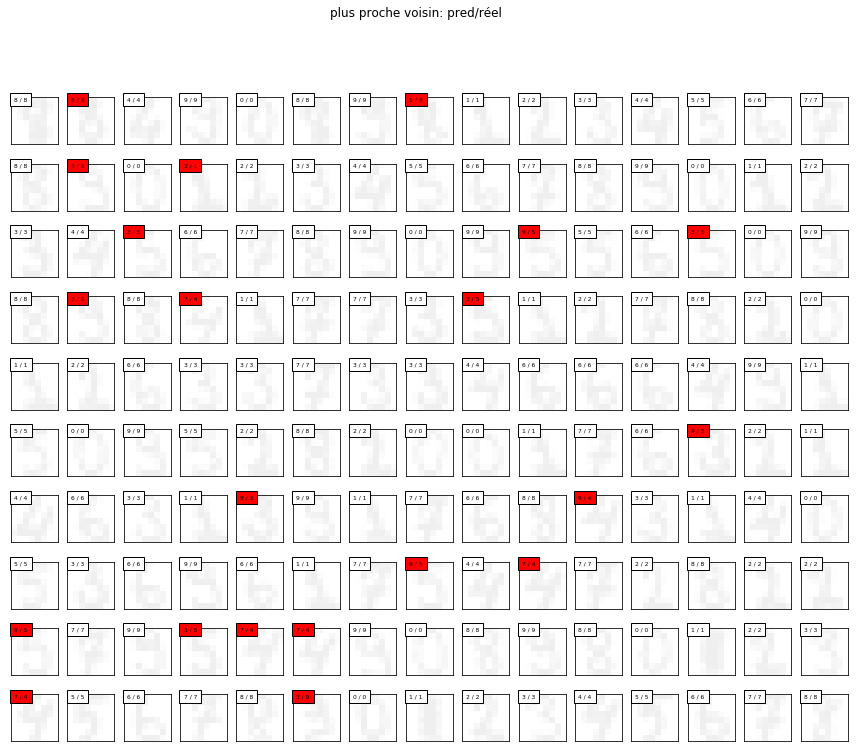

In [25]:
# votre code ici

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

def affichage_150_images(X_test,y_test,y_pred):
    plt.figure(figsize=[15,12])   
    for n in range(150):
        plt.subplot(10,15,n+1,xticks=[],yticks=[])
        plt.imshow(np.reshape(X_test[n,:],(8,8)),cmap='gray_r',vmin=0,vmax=16)
        if y_pred_nn[n]==y_test[n]:
            plt.text(0.1,0.1,str(y_pred[n])+' / '+str(y_test[n]),fontsize=6,bbox=dict(facecolor='white', alpha=1))    
        else:
            plt.text(0.1,0.1,str(y_pred[n])+' / '+str(y_test[n]),fontsize=6,bbox=dict(facecolor='red', alpha=1))    
    plt.suptitle('plus proche voisin: pred/réel');


# exemple d'utilisation: classification au plus proche voisin et bases train / test de la première question:
clf = GaussianNB()  
clf.fit(X_train, y_train)
y_pred_nn = clf.predict(X_test)
affichage_150_images(X_test,y_test,y_pred_nn)    

from sklearn import metrics
    
print(metrics.classification_report(y_test,y_pred_nn))

print(metrics.confusion_matrix(y_test,y_pred_nn))


In [ ]:
#à la surprise générale (non), on a des moins bons résultats.